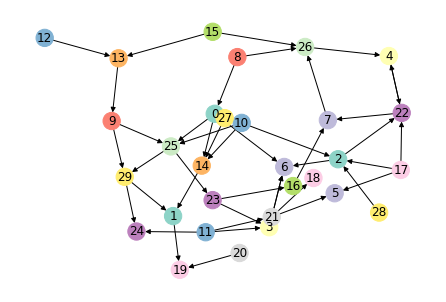

In [10]:
import networkx as nx
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g), with_labels=True, cmap="Set3", node_color = [i for i in g.nodes])

In [16]:
import numpy as np

def randomSurfer(g, n=50, alpha=0.85):
    nx.set_node_attributes(g, 0, name='Number of Visits') # Add a num. of visits counter to each page
    loc = np.random.choice(list(g)) # We start on a random node

    for _ in range(n):
        # If the random probability is bigger than α and the node has neighbors
        if np.random.random() < alpha and len(list(g.neighbors(loc))) != 0:
            # the surfer moves on to a random neighbor
            next_loc = np.random.choice(list(g.neighbors(loc)))
            loc = next_loc
        else: # If the node has no neighbors
            # the surfer moves to a random node (note that it can choose to stay in its current node)
            loc = np.random.choice(list(g))     
        g.nodes[loc]['Number of Visits'] += 1
        
    pageRank = [g.nodes[i]['Number of Visits']/n for i in list(g)]
    return np.array(pageRank)

randomSurfer(g)

array([0.  , 0.04, 0.02, 0.  , 0.08, 0.  , 0.04, 0.04, 0.  , 0.08, 0.02,
       0.02, 0.  , 0.04, 0.02, 0.04, 0.  , 0.  , 0.  , 0.04, 0.04, 0.  ,
       0.1 , 0.02, 0.12, 0.08, 0.04, 0.02, 0.  , 0.1 ])

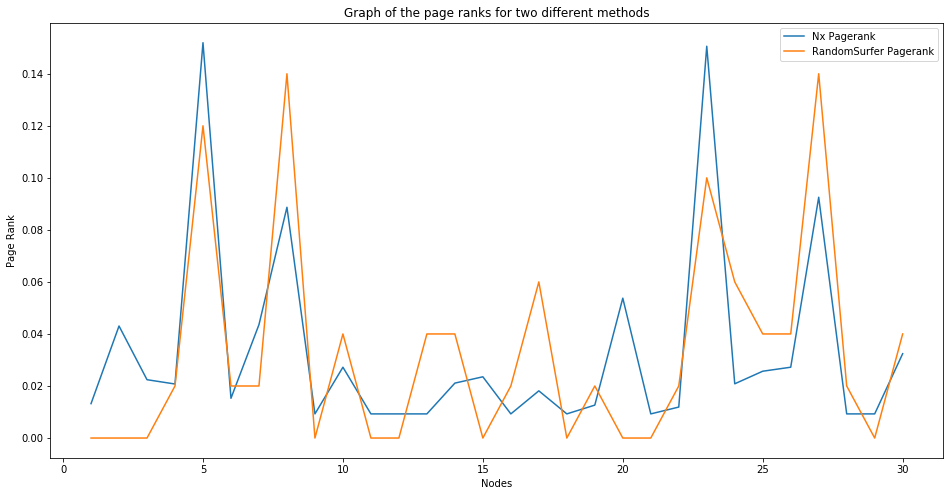

In [24]:
import matplotlib.pyplot as plt

nx_pageRank = np.array(list(nx.pagerank(g).values())) 

plt.figure(figsize=(16,8))
plt.plot(np.arange(1,31), nx_pageRank, label="Nx Pagerank")
plt.plot(np.arange(1,31), randomSurfer(g), label="RandomSurfer Pagerank")
plt.xlabel("Nodes")
plt.ylabel("Page Rank")
plt.legend()
plt.title("Graph of the page ranks for two different methods")
plt.show()